# Proyecto 02 del 1er Bimestre
## Analítica Presciptiva

### Tarea 1: Importación de datos, limpieza y preprocesamiento

Se debe centrar en importar los datos proporcionados en un formato adecuado para que el análisis posterior sea
más sencillo. También verificar si es necesario realizar alguna limpieza de datos y/o pasos de preprocesamiento.

Importación de librerias

In [90]:
import numpy as np
import pandas as pd
import glob
import datetime

Se crea la función para calcular el AQI en base a The EPA's table of breakpoints.  

|O3(ppb)|O3(ppb)|PM2.5(ug/m3)|PM10(ug/m3)|CO(ppm)|SO2(ppb)|NO2(ppb)|AQI|
|-------|-------|------------|-----------|-------|--------|--------|---|
|0–54|-|0.0–12.0|0–54|0.0–4.4|0–35|0–53|0–50|
|(8-hr)||(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)|
|55–70|-|12.1–35.4|55–154|4.5–9.4|36–75|54–100|51–100|
|(8-hr)||(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)|
|71–85|125–164|35.5–55.4|155–254|9.5–12.4|76–185|101–360|101–150|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)||
|86–105|165–204|55.5–150.4|255–354|12.5–15.4|186–304|361–649|151–200|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)||
|106–200|205–404|150.5–250.4|355–424|15.5–30.4|305–604|650–1249|201–300|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
|—|405–504|250.5–350.4|425–504|30.5–40.4|605–804|1250–1649|301–400|
||(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
|—|505–604|350.5–500.4|505–604|40.5–50.4|805–1004|1650–2049|401–500|
||(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
  
Fuente: https://en.wikipedia.org/wiki/Air_quality_index

  
Estos valores fueron transformados de ppb o ppm a ug/m3 en base a la siguiente tabla de conversión:

|Air Pollutant|Conversion Factor|
|-------------|-----------------|
|Sulphur dioxide (SO2)  |1 ppb = 2.62 µg/m3  |
|Nitrogen dioxide (NO2) |1 ppb = 1.88 µg/m3  |
|Carbon monoxide (CO)   |1 ppb = 1.15 µg/m3  |
|Ozone (O3)             |1 ppb = 1.96 µg/m3  |
  
Fuente: https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/

In [91]:
def calculate_aqi(concentration, pollutant):
   if pollutant == "PM10":
      breakpoints = [0, 54, 154, 254, 354, 424, 504, 604]
   elif pollutant == "SO2":
      breakpoints = [0, 91.7, 196.5, 484.7, 796.48, 1582.48, 2630.48]
   elif pollutant == "NO2":
      breakpoints = [0, 99.64, 188, 676.8, 1220.12, 2348.12, 3852.12]
   elif pollutant == "CO":
      breakpoints = [0, 5060, 10810, 14260, 17710, 34960, 57960]
   elif pollutant == "O3":
      breakpoints = [0, 105.84, 137.2, 166.6, 205.8, 392, 604]
   else:
      return "Invalid pollutant"
   
   index = [0, 50, 100, 150, 200, 300, 400, 500]

   for i in range(len(breakpoints) - 1):
      if concentration >= breakpoints[i] and concentration <= breakpoints[i + 1]:
         aqi = ((index[i + 1] - index[i]) / (breakpoints[i + 1] - breakpoints[i])) * (concentration - breakpoints[i]) + index[i]
         return round(aqi)

   return 500

Se lee el archivo csv a dataframe

In [92]:
csv_files = glob.glob('../data/PRSA_Data_20130301-20170228/*.csv')
csv_files

['../data/PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Changping_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Dingling_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Guanyuan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Gucheng_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Huairou_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Shunyi_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Tiantan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Wanliu_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [93]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('../data/PRSA_Data_20130301-20170228/*.csv')], ignore_index = True)

df.shape

(420768, 18)

Se limpian las columnas que no son necesarias.  
Se concatena year-month-day con el siguiente formato AAAA-MM-DD para manejar de mejor manera los datos para agrupar por día.

In [94]:
df = df.drop(columns=['No','hour','PM2.5','TEMP','PRES','DEWP','RAIN','wd','WSPM'], errors='ignore')

combine_lambda = lambda x: '{}-{:02d}-{:02d}'.format(x.year, x.month, x.day)

# df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)

df['date'] = df.apply(combine_lambda, axis = 1)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# df = df.drop(columns=['year','month','day'], errors='ignore')

df.head(25)

,year,month,day,PM10,SO2,NO2,CO,O3,station,date
0,2013,3,1,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
1,2013,3,1,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
2,2013,3,1,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03-01
3,2013,3,1,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03-01
4,2013,3,1,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03-01
5,2013,3,1,5.0,18.0,18.0,400.0,66.0,Aotizhongxin,2013-03-01
6,2013,3,1,3.0,18.0,32.0,500.0,50.0,Aotizhongxin,2013-03-01
7,2013,3,1,6.0,19.0,41.0,500.0,43.0,Aotizhongxin,2013-03-01
8,2013,3,1,6.0,16.0,43.0,500.0,45.0,Aotizhongxin,2013-03-01
9,2013,3,1,8.0,12.0,28.0,400.0,59.0,Aotizhongxin,2013-03-01


Se verifica si hay valores nulos o NaN.

In [95]:
df.isnull().sum()

year           0
month          0
day            0
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
station        0
date           0
dtype: int64

Se limpia los valores nulos o NaN.  
Se vuelve a verificar.

In [96]:
df = df.dropna()

df.isnull().sum()

year       0
month      0
day        0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
station    0
date       0
dtype: int64

Con la nueva columna "date" se agrupan los datos.  
Se calcula el mean de MP10, SO2 y NO2 y el max de CO y O3.

In [97]:
df2 = df.groupby(['date','station']).agg(
    PM10=('PM10','mean'),
    SO2 = ('SO2','mean'),
    NO2 = ('NO2','mean'),
    CO = ('CO','max'),
    O3 = ('O3','max')
    ).reset_index().round(2)

df2



,date,station,PM10,SO2,NO2,CO,O3
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0
...,...,...,...,...,...,...,...
16978,2017-02-28,Nongzhanguan,24.74,7.35,35.65,1700.0,94.0
16979,2017-02-28,Shunyi,28.50,7.12,39.67,1200.0,99.0
16980,2017-02-28,Tiantan,31.15,6.85,43.25,1500.0,94.0
16981,2017-02-28,Wanliu,25.58,7.46,40.92,900.0,100.0


Con una función lambda se llama a la función para calcular el AQI de cada gas previamente preprocesado.

In [98]:
def calculate_aqi_df(df):
    aqi_lambda_pm10 = lambda x: calculate_aqi(x.PM10, 'PM10')
    aqi_lambda_so2 = lambda x: calculate_aqi(x.SO2, 'SO2')
    aqi_lambda_no2 = lambda x: calculate_aqi(x.NO2, 'NO2')
    aqi_lambda_co = lambda x: calculate_aqi(x.CO, 'CO')
    aqi_lambda_o3 = lambda x: calculate_aqi(x.O3, 'O3')

    df['I_PM10'] = df.apply(aqi_lambda_pm10,axis=1)
    df['I_SO2'] = df.apply(aqi_lambda_so2,axis=1)
    df['I_NO2'] = df.apply(aqi_lambda_no2,axis=1)
    df['I_CO'] = df.apply(aqi_lambda_co,axis=1)
    df['I_O3'] = df.apply(aqi_lambda_o3,axis=1)

calculate_aqi_df(df2)

df2.head(10)



,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37
5,2013-03-01,Gucheng,26.00,14.00,14.25,1200.0,61.0,24,8,7,12,29
6,2013-03-01,Huairou,14.32,18.47,12.89,800.0,91.0,13,10,6,8,43
7,2013-03-01,Nongzhanguan,10.83,9.25,27.71,600.0,89.0,10,5,14,6,42
8,2013-03-01,Shunyi,8.86,3.00,13.67,500.0,78.0,8,2,7,5,37
9,2013-03-01,Tiantan,14.46,8.88,21.58,800.0,83.0,13,5,11,8,39


Con los valores de AQI de cada Gas se calcula el valor Final de AQI.

In [99]:
df2['AQI'] = df2[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']].max(axis=1)

df2

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36,36
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44,44
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40,40
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43,43
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978,2017-02-28,Nongzhanguan,24.74,7.35,35.65,1700.0,94.0,23,4,18,17,44,44
16979,2017-02-28,Shunyi,28.50,7.12,39.67,1200.0,99.0,26,4,20,12,47,47
16980,2017-02-28,Tiantan,31.15,6.85,43.25,1500.0,94.0,29,4,22,15,44,44
16981,2017-02-28,Wanliu,25.58,7.46,40.92,900.0,100.0,24,4,21,9,47,47


Con el valor Final de AQI se añade el Nivel de Contaminación del Aire.

In [100]:
niveles = [0,50,100,150,200,250,300,600]
labels = ['Excelent','Good','Slightly Polluted','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted']

df2['AIR_LEVEL'] = pd.cut(df2.AQI,niveles,labels=labels)

df2.head(20)

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI,AIR_LEVEL
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36,36,Excelent
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44,44,Excelent
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40,40,Excelent
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43,43,Excelent
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37,37,Excelent
5,2013-03-01,Gucheng,26.00,14.00,14.25,1200.0,61.0,24,8,7,12,29,29,Excelent
6,2013-03-01,Huairou,14.32,18.47,12.89,800.0,91.0,13,10,6,8,43,43,Excelent
7,2013-03-01,Nongzhanguan,10.83,9.25,27.71,600.0,89.0,10,5,14,6,42,42,Excelent
8,2013-03-01,Shunyi,8.86,3.00,13.67,500.0,78.0,8,2,7,5,37,37,Excelent
9,2013-03-01,Tiantan,14.46,8.88,21.58,800.0,83.0,13,5,11,8,39,39,Excelent


### Tarea 2: Análisis exploratorio de datos

Resumir y visualizar los datos de las formas útiles. Los estudiantes deben pensar en preguntas interesantes que
se podrían comprobar con los datos disponibles y dar respuestas textuales o mediante visualización de datos.

In [101]:
import matplotlib.pyplot as plt

In [105]:
df_final = df2[df2['station'] == 'Aotizhongxin']

(array([15765., 15769., 15773., 15777., 15781., 15785., 15789.]),
 [Text(15765.0, 0, '2013-03-01'),
  Text(15769.0, 0, '2013-03-05'),
  Text(15773.0, 0, '2013-03-09'),
  Text(15777.0, 0, '2013-03-13'),
  Text(15781.0, 0, '2013-03-17'),
  Text(15785.0, 0, '2013-03-21'),
  Text(15789.0, 0, '2013-03-25')])

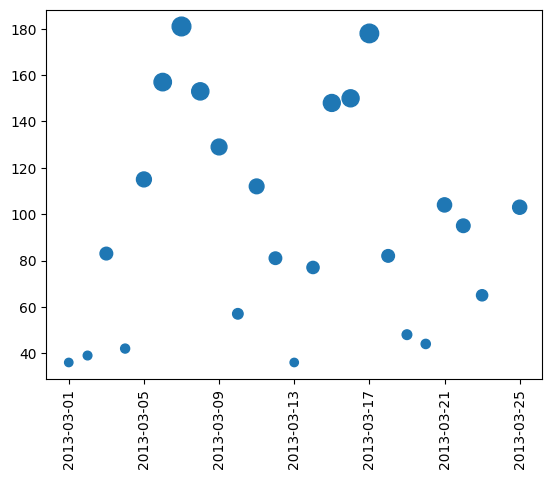

In [106]:
plt.scatter('date','AQI', s='AQI',data=df_final.head(24))
plt.xticks(rotation='vertical')

### Tarea 3: Modelado predictivo

Se debe definir una tarea predictiva que pueda ayudar a predecir la contaminación del aire, a través del valor del
AQI o del Nivel de Contaminación del Aire, en función de sus características. Después de definir la tarea, se debe
utilizar los datos disponibles para seleccionar y obtener un buen modelo para esta tarea. Se debe justificar el
modelo sugerido.

In [107]:
df_final = df2[df2['station'] == 'Aotizhongxin']

In [108]:
from sklearn.model_selection import train_test_split

X = df_final[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']]
y = df_final['AIR_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(model.score(X_test, y_test))

In [110]:
from sklearn.svm import SVC

model = SVC(C=10,kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9347319347319347
Precision: 0.9347319347319347
Recall: 0.9347319347319347
F1 Score: 0.9347319347319346


In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.97202797 0.91608392 0.95087719 0.94035088 0.93333333]
Average Accuracy: 0.942534658324132


In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)
print('Best models', best_model)

c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters {'C': 10, 'kernel': 'rbf'}
Best models SVC(C=10)


In [115]:
def predict_air_level(pm10,so2,no2,co,o3,mode=0):
    df_test = pd.DataFrame({
        'PM10': [pm10],
        'SO2': [so2],
        'NO2': [no2],
        'CO': [co],
        'O3': [o3]
        })
    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']].head(1)

    print(df_test)
    return model.predict(df_test)

def predict_air_level_df(df_test, mode=0):    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']].head(1)

    print(df_test)
    return model.predict(df_test)


In [135]:
station = 'Aotizhongxin'
df_test = df2.query('station != @station').sample()

df_test

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI,AIR_LEVEL
5533,2014-07-11,Dongsi,28.67,5.79,45.71,900.0,146.0,27,3,23,9,115,115,Slightly Polluted


In [137]:
# model.predict(df_test_c)

# regr.predict(df_test)

pm10, so2, no2, co, o3 = 105,5,13,650,119.5

# df_test = pd.DataFrame({
#     'PM10': [pm10],
#     'SO2': [so2],
#     'NO2': [no2],
#     'CO': [co],
#     'O3': [o3]
#     })

df_test = df_test[['PM10','SO2','NO2','CO','O3']]

print(df_test)

predict_air_level_df(df_test)
# predict_air_level(pm10, so2, no2, co, o3,1)

       PM10   SO2    NO2     CO     O3
5533  28.67  5.79  45.71  900.0  146.0
      I_PM10  I_SO2  I_NO2  I_CO  I_O3
5533      27      3     23     9   115


array(['Slightly Polluted'], dtype=object)